<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%962%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Устанавливаем фреймворк университета
!pip install aiuniver

In [14]:
from aiuniver import датасет # Импортируем модуль dataset
from aiuniver import модель # Импортируем модуль model

# Задание №1

1. Используя код ноутбука (блок распознавания рукописных цифр), реализуйте распознавание типов одежды. Для этого скачайте изображения с помощью метода .загрузить_базу_ОДЕЖДА() (Вместо метода .загрузить_базу_МНИСТ())

2. Сделайте аналогичную предобработку данных (так же, как мы делали в случае с цифрами).

3. Создайте модель нейронной сети (можно взять ту же архитектуру, что была на занятии, можно попробовать свою).

4. Обучите нейронную сеть и сделайте оценку точности распознавания. (В параметре "классы" метода тест_модели укажите ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки'])

In [5]:
# Используя код ноутбука (блок распознавания рукописных цифр), реализуйте распознавание типов одежды. Для этого скачайте изображения с помощью метода .загрузить_базу_ОДЕЖДА() (Вместо метода .загрузить_базу_МНИСТ())

(x_train_org, y_train_org), (x_test_org, y_test_org) = датасет.загрузить_базу_ОДЕЖДА() # Загружаем данные набора 

Данные загружены
Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)


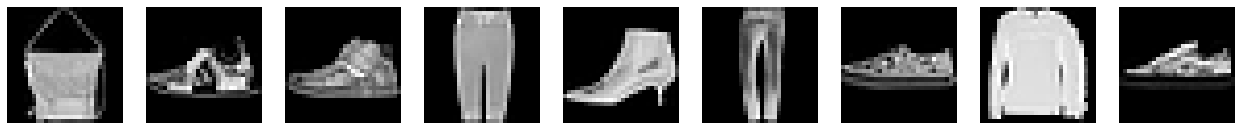

Правильные ответы: [8 7 7 1 9 1 7 2 7]


In [6]:
# Предобработка данных Сделайте аналогичную предобработку данных (так же, как мы делали в случае с цифрами).
# Отображаем примеры цифр
датасет.показать_примеры(
    изображения = x_train_org,
    метки = y_train_org
)

In [8]:
# Делаем предобработку данных для тестовой выборки
x_train = датасет.предобработка_данных(
    сетка = 'полносвязная',
    изображения = x_train_org
)

Размер сформированных данных: (784,)


In [9]:
# Делаем предобработку данных для тестовой выборки
x_test = датасет.предобработка_данных(
    сетка = 'полносвязная',
    изображения = x_test_org
)

Размер сформированных данных: (784,)


In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D # Подключаем керасовский слой Dense
from tensorflow.keras.models import Sequential # Подключаем модель типа Sequential

модель_1 = Sequential() # Создаём сеть прямого распространения
модель_1.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
модель_1.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
модель_1.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [12]:
модель_1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель

Структура модели:
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


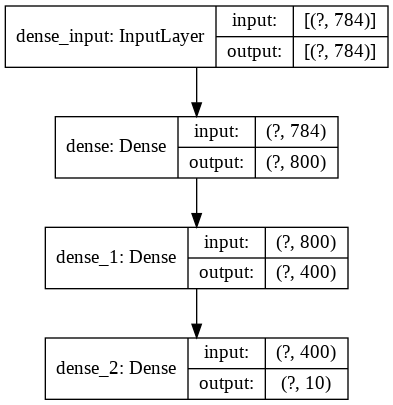

In [13]:
модель.структура_сети(модель_1) #Вывод структуры модели

In [14]:
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать

history = модель_1.fit(x_train, y_train_org, batch_size=128, epochs=15, validation_split=0.2, verbose=1) # Запускаем процесс обучения модели

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4954 - accuracy: 0.8225 - val_loss: 0.4189 - val_accuracy: 0.8443
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3554 - accuracy: 0.8705 - val_loss: 0.3619 - val_accuracy: 0.8743
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3197 - accuracy: 0.8825 - val_loss: 0.3832 - val_accuracy: 0.8616
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2954 - accuracy: 0.8894 - val_loss: 0.3313 - val_accuracy: 0.8796
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2737 - accuracy: 0.8976 - val_loss: 0.3214 - val_accuracy: 0.8839
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2627 - accuracy: 0.9021 - val_loss: 0.3210 - val_accuracy: 0.8858
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2484 - accuracy: 0.9054 - val_loss: 0.3071 - val_accuracy: 0.8897
Epoch 

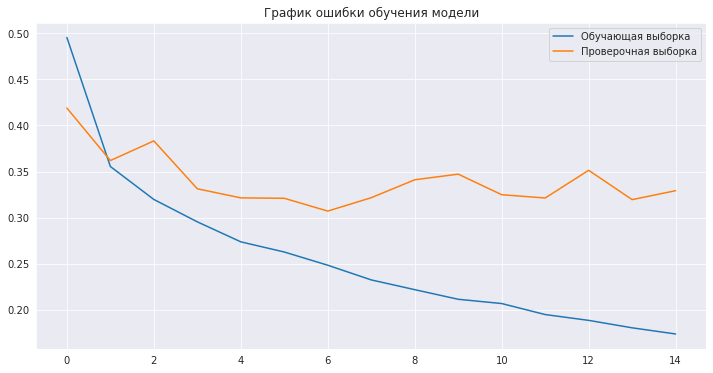

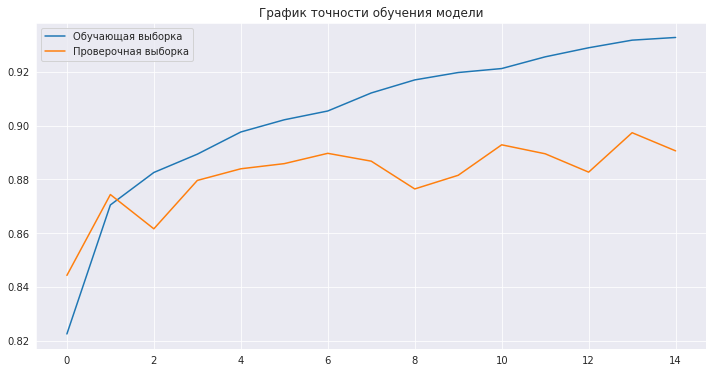

In [15]:
модель.показать_график_обучения(
    статистика = history
)

Обучите нейронную сеть и сделайте оценку точности распознавания. (В параметре "классы" метода тест_модели укажите ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки'])

Тестовое изображение:


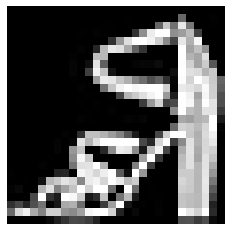


Результат предсказания модели:
Модель распознала модель Футболка на 0.0%
Модель распознала модель Шорты на 0.0%
Модель распознала модель Свитер на 0.0%
Модель распознала модель Платье на 0.0%
Модель распознала модель Плащ на 0.0%
Модель распознала модель Сандали на 100.0%
Модель распознала модель Рубашка на 0.0%
Модель распознала модель Кроссовки на 0.0%
Модель распознала модель Сумка на 0.0%
Модель распознала модель Ботинки на 0.0%


Правильные ответ:  Сандали


In [18]:
модель.тест_модели(
    модель=модель_1,
    тестовый_набор = x_test,
    правильные_ответы = y_test_org,
    классы = ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки']
    )

# Задание №2

1. Используя код ноутбука (блок распознавания рукописных цифр), реализуйте распознавание типов одежды. Для этого скачайте изображения с помощью метода .загрузить_базу_ОДЕЖДА() (Вместо метода .загрузить_базу_МНИСТ())

2. Сделайте предобработку данных, указав в качестве параметра "сетка" значение "сверточная" (обратите внимание на размер полученных данных)

3. Создайте сверточную нейронную сеть произвольной архитектуры.

4. Обучите нейронную сеть и сделайте оценку точности распознавания (В параметре "классы" метода тест_модели укажите ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки'])

In [19]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = датасет.загрузить_базу_ОДЕЖДА() # Загружаем данные набора

Данные загружены
Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)


In [ ]:
#Сделайте предобработку данных, указав в качестве параметра "сетка" значение "сверточная" (обратите внимание на размер полученных данных)

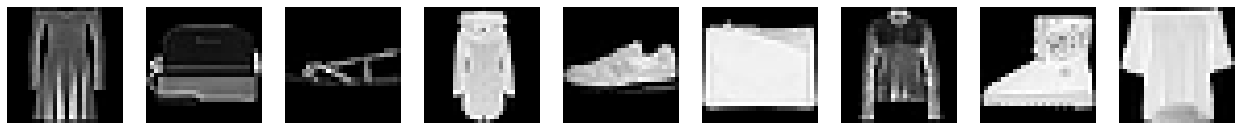

Правильные ответы: [3 8 5 4 7 8 2 9 6]


In [20]:
# Отображаем примеры цифр
датасет.показать_примеры(
    изображения = x_train_org,
    метки = y_train_org
)

In [21]:
# Делаем предобработку данных для обучающей выборки
x_train = датасет.предобработка_данных(
    сетка = 'полносвязная',
    изображения = x_train_org
)

Размер сформированных данных: (784,)


In [22]:
# Делаем предобработку данных для тестовой выборки
x_test = датасет.предобработка_данных(
    сетка = 'полносвязная',
    изображения = x_test_org
)

Размер сформированных данных: (784,)


In [23]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D # Подключаем керасовский слой Dense
from tensorflow.keras.models import Sequential # Подключаем модель типа Sequential

In [27]:
model_1 = Sequential() #Создаем последовательную модель
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_1.add(Flatten())
model_1.add(Dense(10, activation='softmax'))

In [28]:
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

Структура модели:
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________
None


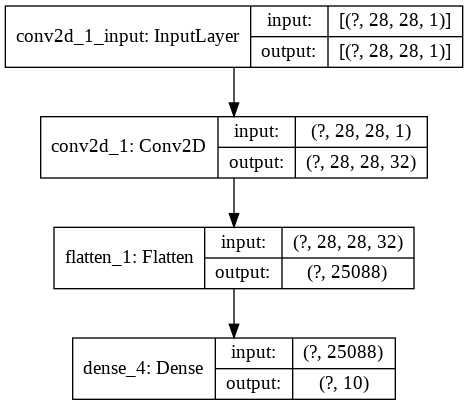

In [29]:
модель.структура_сети(model_1)

In [31]:

history = модель_1.fit(x_train, y_train_org, batch_size=128, epochs=15, validation_split=0.2, verbose=1) # Запускаем процесс обучения модели

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1626 - accuracy: 0.9368 - val_loss: 0.3393 - val_accuracy: 0.8948
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1592 - accuracy: 0.9387 - val_loss: 0.3327 - val_accuracy: 0.8953
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1559 - accuracy: 0.9402 - val_loss: 0.3315 - val_accuracy: 0.8966
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1430 - accuracy: 0.9445 - val_loss: 0.3426 - val_accuracy: 0.8946
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1381 - accuracy: 0.9464 - val_loss: 0.3530 - val_accuracy: 0.8931
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1311 - accuracy: 0.9504 - val_loss: 0.3687 - val_accuracy: 0.8978
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1305 - accuracy: 0.9498 - val_loss: 0.3564 - val_accuracy: 0.8969
Epoch 

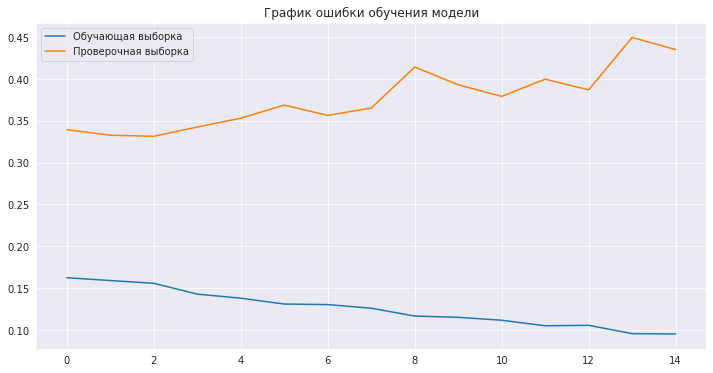

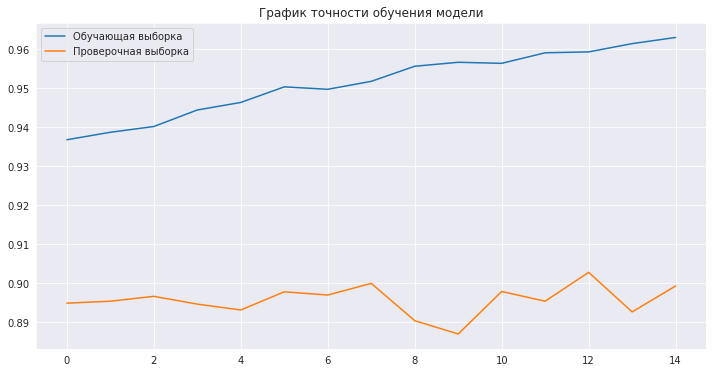

In [32]:
модель.показать_график_обучения(
    статистика = history
)

Тестовое изображение:


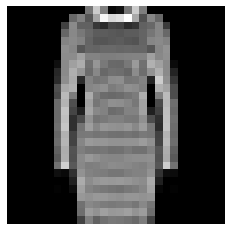


Результат предсказания модели:
Модель распознала модель Футболка на 0.0%
Модель распознала модель Шорты на 0.0%
Модель распознала модель Свитер на 0.0%
Модель распознала модель Платье на 100.0%
Модель распознала модель Плащ на 0.0%
Модель распознала модель Сандали на 0.0%
Модель распознала модель Рубашка на 0.0%
Модель распознала модель Кроссовки на 0.0%
Модель распознала модель Сумка на 0.0%
Модель распознала модель Ботинки на 0.0%


Правильные ответ:  Платье


In [33]:
модель.тест_модели(
    модель=модель_1,
    тестовый_набор = x_test,
    правильные_ответы = y_test_org,
    классы = ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки']
    )

# Задание №3

1. Скачайте базу кожных заболеваний (по аналогии с базой автомобилей), используя метод .загрузить_базу_БОЛЕЗНИ()

2. Посмотрите примеры изображений

3. Создайте обучающую и проверочную выборки (по аналогии с базой автомобилей)

4. Создайте сверточную нейронную сеть произвольной архитектуры (обратите внимание, что у нас в базе 10 классов)

5. Обучите нейронную сеть и сделайте оценку точности распознавания (В параметре "классы" метода тест_модели укажите  ['Акне', 'Витилиго', 'Герпес', 'Дерматит', 'Лишай', 'Невус', 'Псориаз', 'Сыпь', 'Хлоазма', 'Экзема'])

In [ ]:
#Скачайте базу кожных заболеваний (по аналогии с базой автомобилей), используя метод .загрузить_базу_БОЛЕЗНИ()
from aiuniver import датасет # Импортируем модуль dataset
from aiuniver import модель # Импортируем модуль model

In [5]:
датасет.загрузить_базу_БОЛЕЗНИ() # Загружаем данные набора

Загрузка данных (Готово)
База загружена в Google Colaboratory


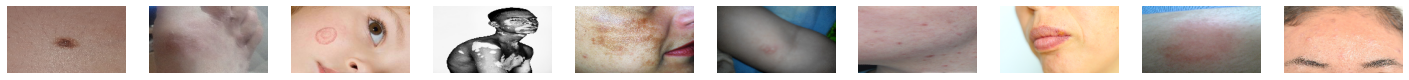

In [10]:
датасет.показать_примеры(путь='/content/diseases/origin')

In [11]:
# Создаем обучающую и проверочную выборки
(x_train, y_train), (x_test, y_test) = датасет.создать_выборки(
                                                путь='/content/diseases/origin',
                                                размер = (54, 96))

Созданы выборки: 
Размер сформированного массива x_train: (4530, 54, 96, 3)
Размер сформированного массива y_train: (4530,)
Размер сформированного массива x_train: (499, 54, 96, 3)
Размер сформированного массива y_train: (499,)


In [47]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout, BatchNormalization # Подключаем керасовский слой Dense
from tensorflow.keras.models import Sequential # Подключаем модель типа Sequential
from tensorflow.keras.optimizers import Adam

In [76]:
model_3 = Sequential() #Создаем последовательную модель
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(54, 96, 3)))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D(2,2))

model_3.add(BatchNormalization())

model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.8))

model_3.add(Flatten())
model_3.add(Dense(24, activation = 'relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(10, activation='softmax'))

In [77]:
model_3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(3e-4), metrics='accuracy')

In [83]:
history = model_3.fit(x_train, y_train, batch_size=10, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
453/453 [==============================] - 2s 4ms/step - loss: 1.0575 - accuracy: 0.6320 - val_loss: 1.7673 - val_accuracy: 0.4068
Epoch 2/50
453/453 [==============================] - 2s 4ms/step - loss: 0.9907 - accuracy: 0.6525 - val_loss: 1.7331 - val_accuracy: 0.4248
Epoch 3/50
453/453 [==============================] - 2s 4ms/step - loss: 1.0096 - accuracy: 0.6384 - val_loss: 1.7298 - val_accuracy: 0.4409
Epoch 4/50
453/453 [==============================] - 2s 3ms/step - loss: 1.0222 - accuracy: 0.6333 - val_loss: 1.7168 - val_accuracy: 0.4409
Epoch 5/50
453/453 [==============================] - 2s 4ms/step - loss: 1.0188 - accuracy: 0.6475 - val_loss: 1.7196 - val_accuracy: 0.4369
Epoch 6/50
453/453 [==============================] - 2s 4ms/step - loss: 0.9935 - accuracy: 0.6455 - val_loss: 1.7456 - val_accuracy: 0.4208
Epoch 7/50
453/453 [==============================] - 2s 3ms/step - loss: 0.9933 - accuracy: 0.6547 - val_loss: 1.7315 - val_accuracy: 0.4349
Epoch 

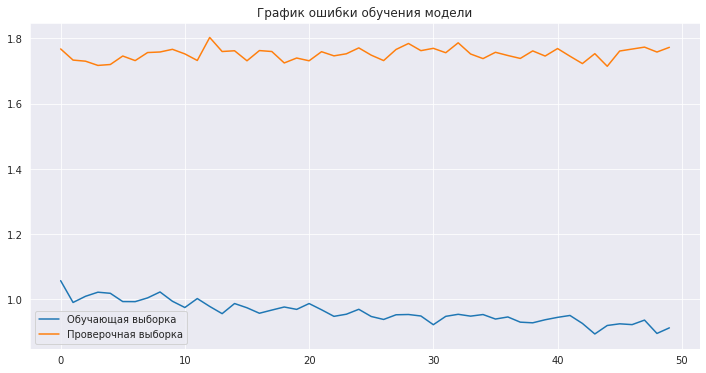

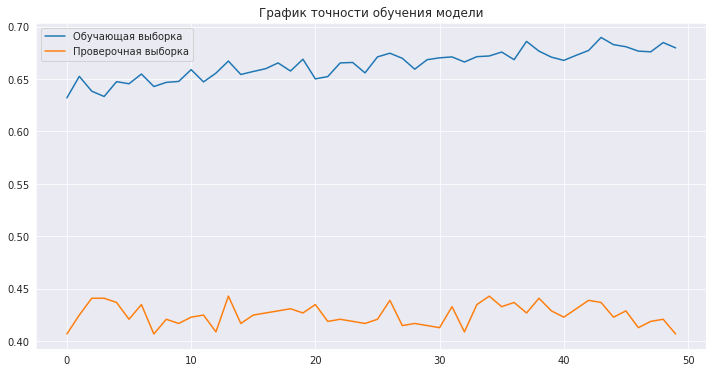

In [84]:
модель.показать_график_обучения(
    статистика = history)

Тестовое изображение:


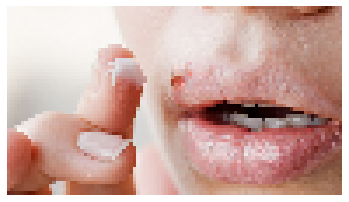


Результат предсказания модели:
Модель распознала модель Акне на 0.11%
Модель распознала модель Витилиго на 15.48%
Модель распознала модель Герпес на 0.18%
Модель распознала модель Дерматит на 15.14%
Модель распознала модель Лишай на 1.22%
Модель распознала модель Невус на 2.51%
Модель распознала модель Псориаз на 2.17%
Модель распознала модель Сыпь на 52.29%
Модель распознала модель Хлоазма на 7.76%
Модель распознала модель Экзема на 3.14%


Правильные ответ:  Сыпь


In [85]:
# Тестируем модель
модель.тест_модели(
    модель=model_3,
    тестовый_набор = x_test,
    правильные_ответы = y_test,
    классы = ['Акне', 'Витилиго', 'Герпес', 'Дерматит', 'Лишай', 'Невус', 'Псориаз', 'Сыпь', 'Хлоазма', 'Экзема'])